<a href="https://colab.research.google.com/github/Labanya23/ML-LEARNING/blob/main/banglalkhaisolated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
from keras import datasets
from skimage.transform import resize
from keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!unzip -o -q "/content/banglalekha-isolated (2).zip" -d /content/


In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Step 1: Set dataset path
data_root = "/content/banglalekha-isolated"  # update if yours is different
image_size = 84

X = []
y = []

label_map = {}  # optional: track class names
class_index = 0

# Step 2: Read images from class folders
for class_name in sorted(os.listdir(data_root)):  # sorted() helps keep classes consistent
    class_folder = os.path.join(data_root, class_name)
    if os.path.isdir(class_folder):
        label_map[class_index] = class_name
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (image_size, image_size))
                X.append(img)
                y.append(class_index)
            except:
                print(f"Skipped corrupted image: {img_path}")
        class_index += 1

# Step 3: Normalize and one-hot encode
X = np.array(X).reshape(-1, image_size, image_size, 1) / 255.0
y = to_categorical(y, num_classes=class_index)

print(f"Loaded {len(X)} images in {class_index} classes.")


Skipped corrupted image: /content/banglalekha-isolated/BanglaLekha-Isolated/Form-based Marking.xlsx
Skipped corrupted image: /content/banglalekha-isolated/BanglaLekha-Isolated/Images
Skipped corrupted image: /content/banglalekha-isolated/BanglaLekha-Isolated/Readme.txt
Loaded 0 images in 1 classes.


In [10]:
data_root = "/content/banglakha-isolated/BanglaLekha-Isolated/Images"


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(class_index, activation='softmax')  # class_index is number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,705 (6.20 MB)

 Trainable params: 1,624,705 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

image_size = 64  # or 32 depending on your data
data_root = "/content/banglalekha-isolated/BanglaLekha-Isolated/Images"

X = []
y = []
class_index = 0

# Go through each class folder
for class_name in sorted(os.listdir(data_root)):
    class_path = os.path.join(data_root, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (image_size, image_size))
                X.append(img)
                y.append(class_index)
            except:
                print(f"Skipped corrupted image: {img_path}")
        class_index += 1

X = np.array(X).reshape(-1, image_size, image_size, 1) / 255.0
y = to_categorical(y, num_classes=class_index)
print(f"Loaded {len(X)} images in {class_index} classes.")


Loaded 21764 images in 11 classes.


In [13]:
from sklearn.model_selection import train_test_split

history= X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 11  # Replace with your actual number of classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # <-- Important!
])


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 96s 173ms/step - accuracy: 0.7551 - loss: 0.7720 - val_accuracy: 0.9070 - val_loss: 0.2966
Epoch 2/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 143s 176ms/step - accuracy: 0.9350 - loss: 0.2032 - val_accuracy: 0.9159 - val_loss: 0.2835
Epoch 3/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 138s 169ms/step - accuracy: 0.9722 - loss: 0.0888 - val_accuracy: 0.9228 - val_loss: 0.3133
Epoch 4/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 142s 169ms/step - accuracy: 0.9833 - loss: 0.0523 - val_accuracy: 0.9203 - val_loss: 0.3627
Epoch 5/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 97s 178ms/step - accuracy: 0.9902 - loss: 0.0324 - val_accuracy: 0.9240 - val_loss: 0.3906
Epoch 6/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 141s 176ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9198 - val_loss: 0.3856
Epoch 7/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 138s 169ms/step - accuracy: 0.9899 - loss: 0.0365 - val_accuracy: 0.9226 - val_loss: 0.3917
Epoch 8/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 147s 178ms/step - accuracy: 0.9965 - l

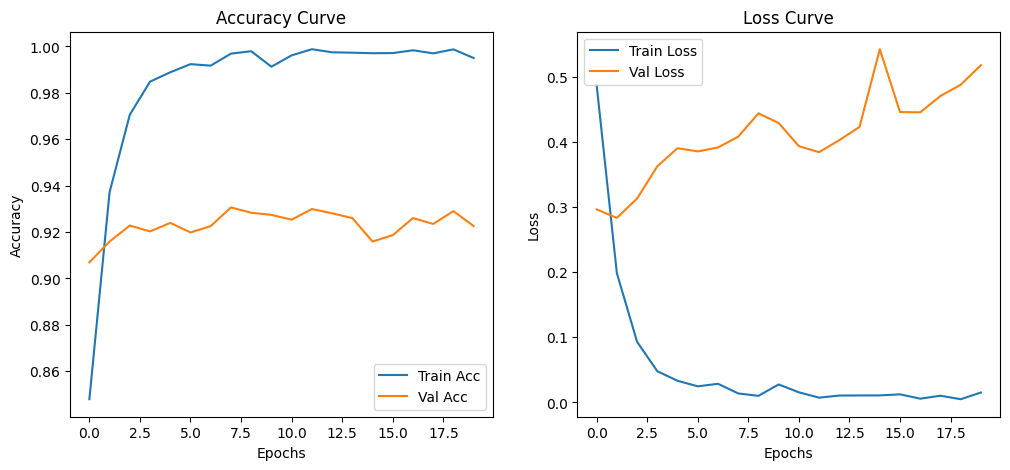

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step


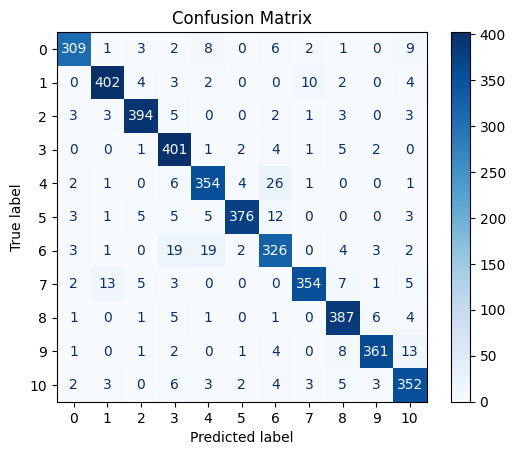

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [19]:
from keras.layers import Conv2D

# Example convolution layer
Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Conv2D name=conv2d_6, built=False>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Set number of classes (update this based on your dataset)
num_classes = 11  # Change this to match your dataset
image_size = 64   # or whatever size you're resizing images to

# Define the model
model = Sequential()

# 1️⃣ Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
# 2️⃣ MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3️⃣ Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# 4️⃣ Second MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5️⃣ Flatten Layer
model.add(Flatten())

# 6️⃣ Dense (Fully Connected) Layer
model.add(Dense(128, activation='relu'))

# 7️⃣ Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,995 (6.20 MB)

 Trainable params: 1,625,995 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
# MaxPool Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPool Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten & Dense
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))  # Adjust 11 to match your number of classes


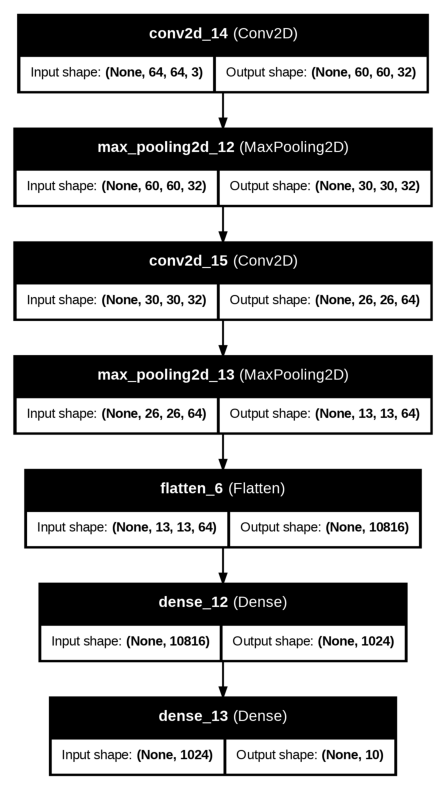

In [51]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Save model diagram to a file
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Show the diagram using matplotlib
img = mpimg.imread('model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 🔹 Flatten the 2D feature maps to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))  # Adjust for your number of classes


In [54]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your full dataset and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 106s 192ms/step - accuracy: 0.7423 - loss: 0.8038 - val_accuracy: 0.9125 - val_loss: 0.2890
Epoch 2/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 133s 176ms/step - accuracy: 0.9458 - loss: 0.1876 - val_accuracy: 0.9175 - val_loss: 0.2658
Epoch 3/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 145s 182ms/step - accuracy: 0.9732 - loss: 0.0824 - val_accuracy: 0.9198 - val_loss: 0.2842
Epoch 4/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 142s 181ms/step - accuracy: 0.9871 - loss: 0.0435 - val_accuracy: 0.9249 - val_loss: 0.2972
Epoch 5/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 137s 172ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9212 - val_loss: 0.3598
Epoch 6/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 143s 174ms/step - accuracy: 0.9907 - loss: 0.0298 - val_accuracy: 0.9290 - val_loss: 0.3532
Epoch 7/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 146s 182ms/step - accuracy: 0.9941 - loss: 0.0199 - val_accuracy: 0.9269 - val_loss: 0.4044
Epoch 8/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 100s 183ms/step - accuracy: 0.9972 -

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))  # Adjust to your number of classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (replace X_train, y_train, X_val, y_val with your actual datasets)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/10
122/545 ━━━━━━━━━━━━━━━━━━━━ 1:09 164ms/step - accuracy: 0.5524 - loss: 1.4073

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-b95aa086fea9>", line 20, in <cell line: 0>
    history = model.fit(
              ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in erro

TypeError: object of type 'NoneType' has no len()

In [24]:
from tensorflow.keras import layers, regularizers

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [27]:
from tensorflow.keras import layers, regularizers

In [28]:
print(tf.__version__)

2.18.0


In [31]:
img = image.load_img("/content/banglalekha-isolated/BanglaLekha-Isolated/Images/1/01_0001_0_08_0916_1990_1.png")

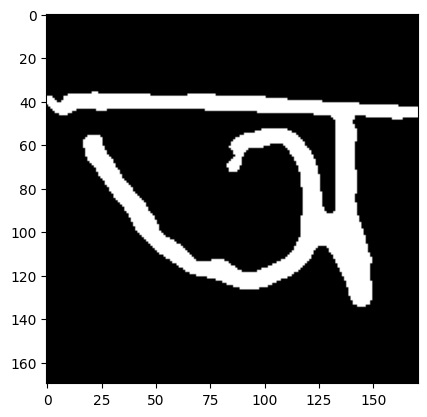

In [32]:
plt.imshow(img)

In [33]:
cv2.imread("/content/banglalekha-isolated/BanglaLekha-Isolated/Images/1/01_0001_0_08_0916_1990_1.png").shape

(170, 171, 3)

In [34]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [37]:
train_dataset = train.flow_from_directory('/content/banglalekha-isolated/BanglaLekha-Isolated/',
                                          target_size = (64,64),
                                          batch_size=512,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory('/content/banglalekha-isolated/BanglaLekha-Isolated/',
                                          target_size = (64,64),
                                          batch_size=512,
                                          class_mode = 'categorical')

Found 21764 images belonging to 1 classes.
Found 21764 images belonging to 1 classes.


In [38]:
len(train_dataset)

43

In [39]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape = (64,64,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(5,5),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(1024,activation='relu'),
                                    ##
                                    # tf.keras.layers.Dropout(0.6),
                                    ##
                                    tf.keras.layers.Dense(10, activation='sigmoid')
                                    ])

In [50]:
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# List all layer names to check the correct one
for layer in model.layers:
    print(layer.name)

# Use the correct layer name from the printed list
layer_name = 'conv2d'  # Replace with actual layer name you want to visualize

# Create a new model that will return the output of the specified layer
#intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Prepare one image from your validation set (shape: [1, 64, 64, 1])
image = np.expand_dims(validation_dataset[0][0], axis=0)  # Make sure it's batch-shaped

# Predict to get feature maps
#feature_maps = intermediate_model.predict(image)

# Visualize the first few feature maps
#num_filters = min(6, feature_maps.shape[-1])  # show first 6 filters
plt.figure(figsize=(15, 5))
#for i in range(num_filters):
   #plt.subplot(1, num_filters, i + 1)
    ##plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    #plt.axis('off')
#plt.suptitle(f'Activations from layer: {layer_name}')
#plt.show()


conv2d_14
max_pooling2d_12
conv2d_15
max_pooling2d_13
flatten_6
dense_12
dense_13


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>